In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Egypt_Houses_Price.csv', sep = ',')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [3]:
df.shape

(27361, 12)

# Preprocessing and type formatting 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [5]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [6]:
df.isin(['Unknown']).sum()

Type                 36
Price                37
Bedrooms             36
Bathrooms            36
Area                 36
Furnished          8528
Level             10439
Compound          11068
Payment_Option        0
Delivery_Date     10108
Delivery_Term         0
City                  0
dtype: int64

In [7]:
# Replace "Unknown" with NaN across the dataframe
df.replace('Unknown', pd.NA, inplace=True)

In [8]:
df.isnull().sum()

Type                 36
Price                39
Bedrooms            239
Bathrooms           207
Area                507
Furnished          8528
Level             10439
Compound          11068
Payment_Option        0
Delivery_Date     10108
Delivery_Term         0
City                  0
dtype: int64

In [9]:
df.duplicated().sum()

1591

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(25770, 12)

In [12]:
df2 = df.dropna(subset=['Price', 'Area', 'Bedrooms', 'Bathrooms'])
df2.shape

(25143, 12)

In [13]:
unique_bathrooms = df2['Bathrooms'].unique()
unique_bedrooms = df2['Bedrooms'].unique()
unique_bathrooms, unique_bedrooms

(array(['3.0', '2.0', '5.0', '1.0', '4.0', '7.0', '10+', '3', '2', '1',
        '4', '6', '5', '7', '6.0', '10', '8', '9', '8.0', '10.0', '9.0'],
       dtype=object),
 array(['3.0', '2.0', '4.0', '5.0', '1.0', '7.0', '6.0', '10+', '3', '2',
        '5', '4', '1', '6', '7', '8', '10', '9', '9.0', '8.0', '10.0'],
       dtype=object))

In [14]:
bathCounts = df2['Bathrooms'].value_counts()
bedCounts = df2['Bedrooms'].value_counts()
(bedCounts, bathCounts)

(3       9123
 2       4378
 4       3984
 3.0     1966
 5       1708
 4.0      930
 1        799
 2.0      745
 6        534
 5.0      425
 1.0      152
 7        134
 6.0      117
 8         47
 7.0       31
 9         27
 10        25
 9.0        7
 10.0       7
 8.0        3
 10+        1
 Name: Bedrooms, dtype: int64,
 2       7179
 3       5681
 4       3035
 1       2928
 2.0     1398
 3.0     1321
 5       1314
 4.0      682
 1.0      509
 6        396
 5.0      335
 7        147
 6.0       86
 8         49
 7.0       32
 10        17
 9         13
 8.0       13
 9.0        4
 10.0       3
 10+        1
 Name: Bathrooms, dtype: int64)

In [15]:
# Convert 'Price', 'Bedrooms', 'Bathrooms', and 'Area' to numeric types
# Attempting to convert might reveal non-numeric characters which need to be handled beforehand
# Using errors='coerce' to convert non-convertible values to NaN, which will then be handled

df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')
df2['Bedrooms'] = pd.to_numeric(df2['Bedrooms'], errors='coerce', downcast='integer' )
df2['Bathrooms'] = pd.to_numeric(df2['Bathrooms'], errors='coerce', downcast='integer')
df2['Area'] = pd.to_numeric(df2['Area'], errors='coerce')


In [16]:
df2.isna().sum()

Type                  0
Price                 0
Bedrooms              1
Bathrooms             1
Area                  0
Furnished          7773
Level              9293
Compound          10188
Payment_Option        0
Delivery_Date      9161
Delivery_Term         0
City                  0
dtype: int64

In [17]:
df2.dropna(subset=['Bedrooms', 'Bathrooms'], inplace=True)

## Type column processing

In [18]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', <NA>, 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [19]:
# Cleaning inconsistencies in the 'Type' column by consolidating similar categories
df2['Type'] = df2['Type'].replace({
    'Twin house': 'Twin House',
    'Standalone Villa': 'Stand Alone Villa'
})

## Compound column processing 

In [20]:
df2['Compound'].value_counts()

Madinaty                     1089
Mountain View North Coast     736
Hyde Park New Cairo           450
Rehab City                    408
Mountain View iCity           364
                             ... 
Venus                           1
Assiut University               1
Golden Coast Sokhna             1
Amoun                           1
Selena                          1
Name: Compound, Length: 554, dtype: int64

In [21]:
# Update the 'Compound' column: Set rows with a value to 1 and NaN values to 0
df2['Compound'] = df2['Compound'].notna().astype(float)
df2['Compound'].value_counts()

1.0    14955
0.0    10187
Name: Compound, dtype: int64

In [22]:
df2.isna().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         7772
Level             9293
Compound             0
Payment_Option       0
Delivery_Date     9161
Delivery_Term        0
City                 0
dtype: int64

## Delivery_Term' and 'Delivery_Date' columns processing 

In [23]:
# Examine unique values in 'Delivery_Term' and 'Delivery_Date' columns
unique_delivery_term = df2['Delivery_Term'].unique()
unique_delivery_date = df2['Delivery_Date'].unique()

unique_delivery_term, unique_delivery_date


(array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
        'Not Finished'], dtype=object),
 array(['Ready to move', '2024', <NA>, '2023', 'soon', '2025',
        'within 6 months', '2022', '2026', '2027'], dtype=object))

In [24]:
# Replace "Unknown " entries (with an extra space) in 'Delivery_Term' with NaN
df2['Delivery_Term'] = df2['Delivery_Term'].replace('Unknown ', pd.NA)
df2.isna().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         7772
Level             9293
Compound             0
Payment_Option       0
Delivery_Date     9161
Delivery_Term     4391
City                 0
dtype: int64

In [25]:
# Filter rows where 'Furnished', 'Delivery_Term', and 'Delivery_Date' are all NaN and get the count
df2[df2[['Furnished', 'Delivery_Term', 'Delivery_Date']].isna().all(axis=1)].shape[0]


1739

In [26]:
# Drop rows where 'Furnished', 'Delivery_Term', and 'Delivery_Date' are all NaN
df2 = df2.drop(df2[df2[['Furnished', 'Delivery_Term', 'Delivery_Date']].isna().all(axis=1)].index)
df2.shape


(23403, 12)

In [27]:
df2['Delivery_Term'].value_counts()

Finished         13177
Semi Finished     5025
Not Finished      1664
Core & Shell       885
Name: Delivery_Term, dtype: int64

In [28]:
def fill_delivery_term(df):
    """
    Function to fill missing 'Delivery_Term' values based on 'Delivery_Date' values
    according to the specified rules.
    """
    # Rule 1: 'Ready to move' => 'Finished'
    df2.loc[(df2['Delivery_Term'].isna()) & (df2['Delivery_Date'] == 'Ready to move'), 'Delivery_Term'] = 'Finished'

    # Rule 2: {'within 6 months', '2022', '2023'} => 'Semi Finished'
    conditions_semi_finished = df2['Delivery_Date'].isin(['within 6 months', '2022', '2023'])
    df2.loc[(df2['Delivery_Term'].isna()) & conditions_semi_finished, 'Delivery_Term'] = 'Semi Finished'

    # Rule 3: {'2024', '2025'} => 'Core & Shell'
    conditions_core_shell = df2['Delivery_Date'].isin(['2024', '2025'])
    df2.loc[(df2['Delivery_Term'].isna()) & conditions_core_shell, 'Delivery_Term'] = 'Core & Shell'
    
    # Rule 4: {'2026', '2027'} => 'Not Finished'
    conditions_not_finished = df2['Delivery_Date'].isin(['2026', '2027'])
    df2.loc[(df2['Delivery_Term'].isna()) & conditions_not_finished, 'Delivery_Term'] = 'Not Finished'
    
    return df

# Apply the function to the DataFrame
df3 = fill_delivery_term(df2)

In [29]:
df3.isna().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         6033
Level             8459
Compound             0
Payment_Option       0
Delivery_Date     7422
Delivery_Term     1442
City                 0
dtype: int64

In [30]:
#Drop Delivery_Date already mapped to Delivery_Term
df3 = df3.drop(columns=['Delivery_Date'])

In [31]:
df3.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,0.0,Cash,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,0.0,Cash,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,0.0,Cash,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,0.0,Cash,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,1.0,Cash,Semi Finished,New Cairo - El Tagamoa


In [32]:
df3.shape

(23403, 11)

## Furnished column processing 

In [33]:
df3['Furnished'].unique()

array(['No', <NA>, 'Yes'], dtype=object)

In [34]:
df3['Furnished'].value_counts()

No     15249
Yes     2121
Name: Furnished, dtype: int64

In [35]:
# Calculate the number of rows with 'Furnished' = NA and 'Delivery_Term' != 'Finished'
condition_NotFinished = df3['Furnished'].isna() & (df3['Delivery_Term'] != 'Finished')
count = condition_NotFinished.sum()
count

1951

In [36]:
# Map all rows with 'Furnished' = NA and 'Delivery_Term' != 'Finished' to 'No' in 'Furnished'
df3.loc[condition_NotFinished, 'Furnished'] = 'No'
# Check the number of remaining NA values after applying the mapping
df3.isna().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         4082
Level             8459
Compound             0
Payment_Option       0
Delivery_Term     1442
City                 0
dtype: int64

In [37]:
# Convert 'Furnished' column to numerical format: Yes = 1, No = 0
df3['Furnished'] = df3['Furnished'].map({'Yes': 1, 'No': 0})

## Level column processing

In [38]:
df3['Level'].unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', <NA>], dtype=object)

In [39]:
# Convert 'Ground' to '0', '10+' to '11', and 'Highest' to '12' in the 'Level' column
df3['Level'] = df3['Level'].replace({'Ground': '0', '10+': '11', 'Highest': '12'})

df3['Level'].unique()

array(['7', '11', '1', '10', '0', '12', '3', '2', '4', '9', '5', '8', '6',
       <NA>], dtype=object)

In [40]:
# Calculate the number of entries with 'Level' = NA and 'Type' in the specified categories
ground_types = ['Twin House', 'Town House', 'Stand Alone Villa', 'Chalet']
condition_ground = df3['Level'].isna() & df3['Type'].isin(ground_types)
count = condition_ground.sum()
count


8405

In [41]:
# Map 'Level' to '0' for entries where 'Level' is NA and 'Type' is one of the specified categories
df3.loc[condition_ground, 'Level'] = '0'

In [42]:
# Calculate the number of entries with 'Level' = NA and 'Type' = 'Penthouse'
condition_penthouse = df3['Level'].isna() & (df3['Type'] == 'Penthouse')
penthouse_na_count = condition_penthouse.sum()

penthouse_na_count

24

In [43]:
# Map 'Level' to '12' for entries where 'Level' is NA and 'Type' is 'Penthouse'
df3.loc[condition_penthouse, 'Level'] = '12'

df3.isna().sum()

Type                 0
Price                0
Bedrooms             0
Bathrooms            0
Area                 0
Furnished         4082
Level               30
Compound             0
Payment_Option       0
Delivery_Term     1442
City                 0
dtype: int64

In [44]:
df3.shape

(23403, 11)

In [45]:
df3['Level'] = pd.to_numeric(df3['Level'], downcast='integer')

In [46]:
# Drop rows with any remaining NA values to create a new DataFrame df4
df4 = df3.dropna()

In [47]:
df4.isna().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Term     0
City              0
dtype: int64

In [48]:
df4.shape

(17868, 11)

## Payment_Option column processing 

In [49]:
# Display the unique values in the 'Payment_Option' column of df4
df4['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [50]:
df4['Payment_Option'].value_counts()

Cash                   7244
Cash or Installment    6517
Installment            3035
Unknown Payment        1072
Name: Payment_Option, dtype: int64

In [51]:
# Calculate the number of entries with 'Payment_Option' = 'Unknown Payment' and 
# 'Delivery_Term' in {'Core & Shell', 'Not Finished'}
condition_unknown_payment = (
    (df4['Payment_Option'] == 'Unknown Payment') & 
    df4['Delivery_Term'].isin(['Core & Shell', 'Not Finished'])
)
unknown_payment_count = condition_unknown_payment.sum()

unknown_payment_count

187

In [52]:
# Correcting the mapping to 'Installment' for the specified condition
df4.loc[condition_unknown_payment, 'Payment_Option'] = 'Installment'

In [53]:
# Calculate the number of entries with 'Payment_Option' = 'Unknown Payment' and 'Delivery_Term' = 'Semi Finished'
condition_semi_finished_unknown_payment = (
    (df4['Payment_Option'] == 'Unknown Payment') & 
    (df4['Delivery_Term'] == 'Semi Finished')
)
semi_finished_unknown_payment_count = condition_semi_finished_unknown_payment.sum()

semi_finished_unknown_payment_count


351

In [54]:
df4.loc[condition_semi_finished_unknown_payment, 'Payment_Option'] = 'Cash or Installment'

In [55]:
# Drop all rows with 'Payment_Option' = 'Unknown Payment'
df4 = df4[df4['Payment_Option'] != 'Unknown Payment']

In [56]:
df4['Payment_Option'].value_counts()

Cash                   7244
Cash or Installment    6868
Installment            3222
Name: Payment_Option, dtype: int64

In [57]:
df4.shape

(17334, 11)

# Outlier detection and removal (Price/Area)

In [58]:
df4['Price'].describe()

count    1.733400e+04
mean     4.744314e+06
std      5.760189e+06
min      3.000000e+04
25%      1.370000e+06
50%      2.999544e+06
75%      6.168000e+06
max      2.050000e+08
Name: Price, dtype: float64

In [59]:
df4['Area'].describe()

count    17334.000000
mean       236.361524
std        161.922973
min         10.000000
25%        129.000000
50%        185.000000
75%        284.000000
max        995.000000
Name: Area, dtype: float64

In [60]:
# Create new column for price per Meter
df4['Price_Per_M'] = df4['Price'] / df4['Area']

df4.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Term,City,Price_Per_M
0,Duplex,4000000,3.0,3.0,400.0,0.0,7.0,0.0,Cash,Finished,Nasr City,10000.000000
1,Apartment,4000000,3.0,3.0,160.0,0.0,11.0,0.0,Cash,Finished,Camp Caesar,25000.000000
2,Apartment,2250000,3.0,2.0,165.0,0.0,1.0,0.0,Cash,Finished,Smoha,13636.363636
3,Apartment,1900000,3.0,2.0,230.0,0.0,10.0,0.0,Cash,Finished,Nasr City,8260.869565
4,Apartment,5800000,2.0,3.0,160.0,0.0,0.0,1.0,Cash,Semi Finished,New Cairo - El Tagamoa,36250.000000


In [61]:
df4['Price_Per_M'].describe()

count    1.733400e+04
mean     1.900746e+04
std      2.546782e+04
min      5.263158e+01
25%      8.519160e+03
50%      1.702703e+04
75%      2.558755e+04
max      2.636364e+06
Name: Price_Per_M, dtype: float64

In [62]:
# Compute IQR and identify outliers
Q1 = df4['Price_Per_M'].quantile(0.25)
Q3 = df4['Price_Per_M'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 1.5 * IQR

In [63]:
lower_bound,upper_bound

(3398.6445963638134, 51190.12318358282)

In [64]:
 df4[(df4['Price_Per_M'] <= lower_bound) | (df4['Price_Per_M'] >= upper_bound)]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Term,City,Price_Per_M
10,Apartment,309825,4.0,3.0,153.0,0.0,1.0,1.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,2025.000000
17,Apartment,143000,1.0,1.0,71.0,0.0,1.0,1.0,Cash or Installment,Semi Finished,New Capital City,2014.084507
35,Duplex,590000,4.0,2.0,238.0,0.0,0.0,0.0,Cash or Installment,Not Finished,New Cairo - El Tagamoa,2478.991597
68,Duplex,335000,5.0,2.0,189.0,0.0,5.0,0.0,Cash,Not Finished,Damietta City,1772.486772
102,Apartment,370000,3.0,2.0,130.0,0.0,3.0,0.0,Cash or Installment,Not Finished,Dar al-Salaam,2846.153846
...,...,...,...,...,...,...,...,...,...,...,...,...
27247,Town House,300000,4.0,4.0,220.0,0.0,0.0,1.0,Cash or Installment,Not Finished,New Cairo - El Tagamoa,1363.636364
27249,Stand Alone Villa,675000,4.0,4.0,268.0,0.0,0.0,1.0,Cash or Installment,Semi Finished,Sheikh Zayed,2518.656716
27295,Stand Alone Villa,850000,4.0,3.0,285.0,0.0,0.0,0.0,Cash or Installment,Not Finished,New Cairo - El Tagamoa,2982.456140
27324,Stand Alone Villa,49500000,5.0,5.0,900.0,1.0,0.0,1.0,Cash,Finished,(View phone number),55000.000000


In [65]:
# Drop  outliers
df5 = df4[(df4['Price_Per_M'] >= lower_bound) & (df4['Price_Per_M'] <= upper_bound)]

df5.shape

(15235, 12)

In [66]:
#Check price per m stats changes
df4['Price_Per_M'].describe()

count    1.733400e+04
mean     1.900746e+04
std      2.546782e+04
min      5.263158e+01
25%      8.519160e+03
50%      1.702703e+04
75%      2.558755e+04
max      2.636364e+06
Name: Price_Per_M, dtype: float64

In [67]:
#Display entries that might be outliers
df5[(df5['Area']<100)&(df5['Bedrooms']>3)]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Term,City,Price_Per_M
3192,Apartment,375000,4.0,1.0,90.0,0.0,5.0,0.0,Cash,Finished,Asafra,4166.666667
3292,Apartment,375000,4.0,1.0,90.0,0.0,5.0,0.0,Cash,Finished,Asafra,4166.666667
15245,Chalet,500000,5.0,4.0,65.0,0.0,1.0,0.0,Cash or Installment,Finished,Ras al-Bar,7692.307692
16519,Chalet,650000,5.0,1.0,80.0,1.0,5.0,0.0,Cash,Finished,Abu Talat,8125.000000
17166,Twin House,2500000,4.0,3.0,82.0,0.0,1.0,1.0,Cash,Finished,North Coast,30487.804878


In [68]:
#Drop specified rows
df5 = df5.drop(df5[(df5['Area']<100) & (df5['Bedrooms']>3)].index)
df5.shape

(15230, 12)

## City column processing

In [69]:
city_counts = df5['City'].value_counts()
city_counts

New Cairo - El Tagamoa    3985
North Coast               2655
Sheikh Zayed              1496
6th of October            1163
Madinaty                  1079
                          ... 
Dar al-Salaam                1
Quesna                       1
Salam City                   1
Attarin                      1
Abu Rawash                   1
Name: City, Length: 163, dtype: int64

In [70]:
# Find cities with less than 5 listings and remove them
cities_to_keep = city_counts[city_counts >= 5].index
df5 = df5[df5['City'].isin(cities_to_keep)]


In [71]:
df5['City'].value_counts()

New Cairo - El Tagamoa    3985
North Coast               2655
Sheikh Zayed              1496
6th of October            1163
Madinaty                  1079
                          ... 
Fleming                      5
Bahray - Anfoshy             5
Maryotaya                    5
Camp Caesar                  5
Hammam                       5
Name: City, Length: 89, dtype: int64

In [72]:
# Identify cities with less than 10 listings
cities_less_than_10 = city_counts[city_counts < 10].index.tolist()

# Replace cities with less than 10 listings with 'Others' 
df5['City'] = df5['City'].apply(lambda x: 'Others' if x in cities_less_than_10 else x)

df5['City'].value_counts()

New Cairo - El Tagamoa    3985
North Coast               2655
Sheikh Zayed              1496
6th of October            1163
Madinaty                  1079
                          ... 
Asafra                      12
Hadayek al-Kobba            12
Shubra                      11
Gouna                       11
Zagazig                     10
Name: City, Length: 61, dtype: int64

In [73]:
df5 = df5.drop(df5[df5['City']=='(View phone number)'].index)

In [74]:
def remove_outliers(df): 
    # Function to calculate lower and upper bounds for a given series 
    def bounds(s): 
        q1, q3 = s.quantile([0.25, 0.75]) 
        iqr = q3 - q1 
        lower_bound = q1 - 0.8 * iqr 
        upper_bound = q3 +  0.8 * iqr 
        return lower_bound, upper_bound

    # Group by 'City' and apply the bounds function to the 'Price' column
    bounds_df = df.groupby('City')['Price_Per_M'].apply(bounds).reset_index(name='Bounds')

    # Explode the bounds into separate columns for easier filtering
    bounds_df[['Lower_Bound', 'Upper_Bound']] = pd.DataFrame(bounds_df['Bounds'].tolist(), index=bounds_df.index)
    bounds_df.drop(columns=['Bounds'], inplace=True)

    # Merge the original dataframe with the bounds
    merged_df = pd.merge(df, bounds_df, on='City')

    # Filter out rows where 'Price' is outside the bounds for its respective 'City'
    filtered_df = merged_df[(merged_df['Price_Per_M'] >= merged_df['Lower_Bound']) & (merged_df['Price_Per_M'] <= merged_df['Upper_Bound'])]

    # Drop the bounds columns to return to the original dataframe structure
    filtered_df.drop(columns=['Lower_Bound', 'Upper_Bound'], inplace=True)

    return filtered_df

df6 = remove_outliers(df5)

df6

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Term,City,Price_Per_M
0,Duplex,4000000,3.0,3.0,400.0,0.0,7.0,0.0,Cash,Finished,Nasr City,10000.000000
1,Apartment,1900000,3.0,2.0,230.0,0.0,10.0,0.0,Cash,Finished,Nasr City,8260.869565
2,Apartment,1600000,3.0,2.0,220.0,0.0,9.0,0.0,Cash or Installment,Core & Shell,Nasr City,7272.727273
3,Apartment,1500000,3.0,2.0,136.0,0.0,3.0,1.0,Cash,Not Finished,Nasr City,11029.411765
7,Apartment,750000,3.0,1.0,115.0,0.0,10.0,0.0,Cash,Finished,Nasr City,6521.739130
...,...,...,...,...,...,...,...,...,...,...,...,...
15048,Chalet,500000,1.0,1.0,70.0,1.0,1.0,0.0,Cash,Finished,Ras Sedr,7142.857143
15049,Stand Alone Villa,550000,2.0,2.0,100.0,1.0,0.0,1.0,Cash,Finished,Ras Sedr,5500.000000
15050,Twin House,950000,2.0,2.0,150.0,1.0,0.0,0.0,Cash or Installment,Finished,Ras Sedr,6333.333333
15051,Stand Alone Villa,1700000,3.0,2.0,250.0,1.0,0.0,0.0,Cash,Finished,Ras Sedr,6800.000000


# Visualization

In [75]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

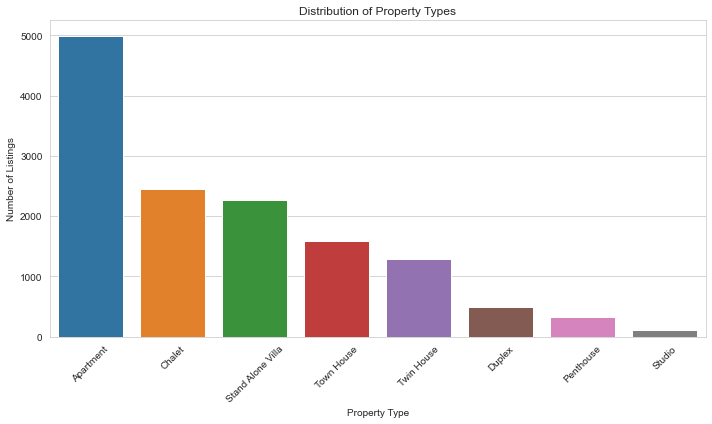

In [76]:
# Distribution of Property Types
plt.figure(figsize=(10, 6))
type_count_plot = sns.countplot(data=df6, x='Type', order = df6['Type'].value_counts().index)
type_count_plot.set_title('Distribution of Property Types')
type_count_plot.set_xlabel('Property Type')
type_count_plot.set_ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

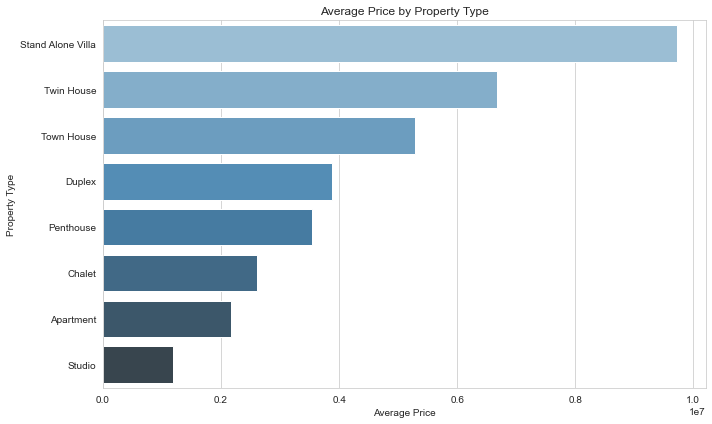

In [77]:
# Calculate the average price for each property type 
avg_price_per_type = df6.groupby('Type')['Price'].mean().reset_index()

# Sort the types by average price for better visualization
avg_price_per_type_sorted = avg_price_per_type.sort_values(by='Price', ascending=False)

# Plotting average price by property type 
plt.figure(figsize=(10, 6))
avg_price_plot_df5 = sns.barplot(x='Price', y='Type', data=avg_price_per_type_sorted, palette="Blues_d")
avg_price_plot_df5.set_title('Average Price by Property Type')
avg_price_plot_df5.set_xlabel('Average Price')
avg_price_plot_df5.set_ylabel('Property Type')
plt.tight_layout()
plt.show()

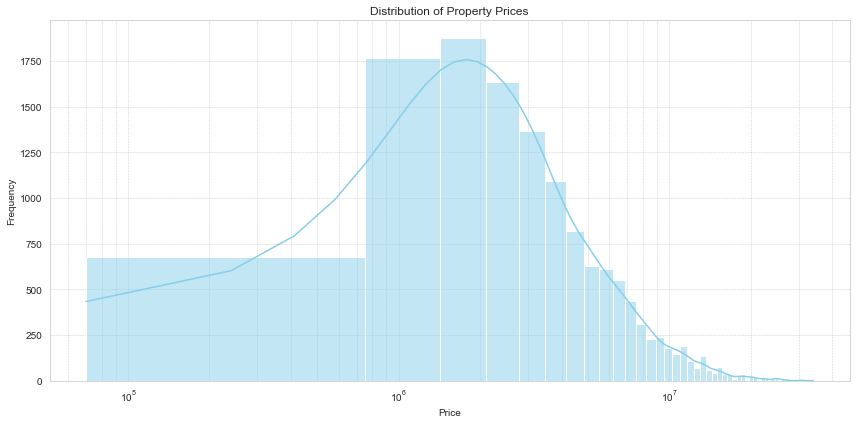

In [78]:
# Plotting the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(df6
['Price'], bins=50, kde = True, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xscale('log')  # Using a logarithmic scale due to wide distribution of prices
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

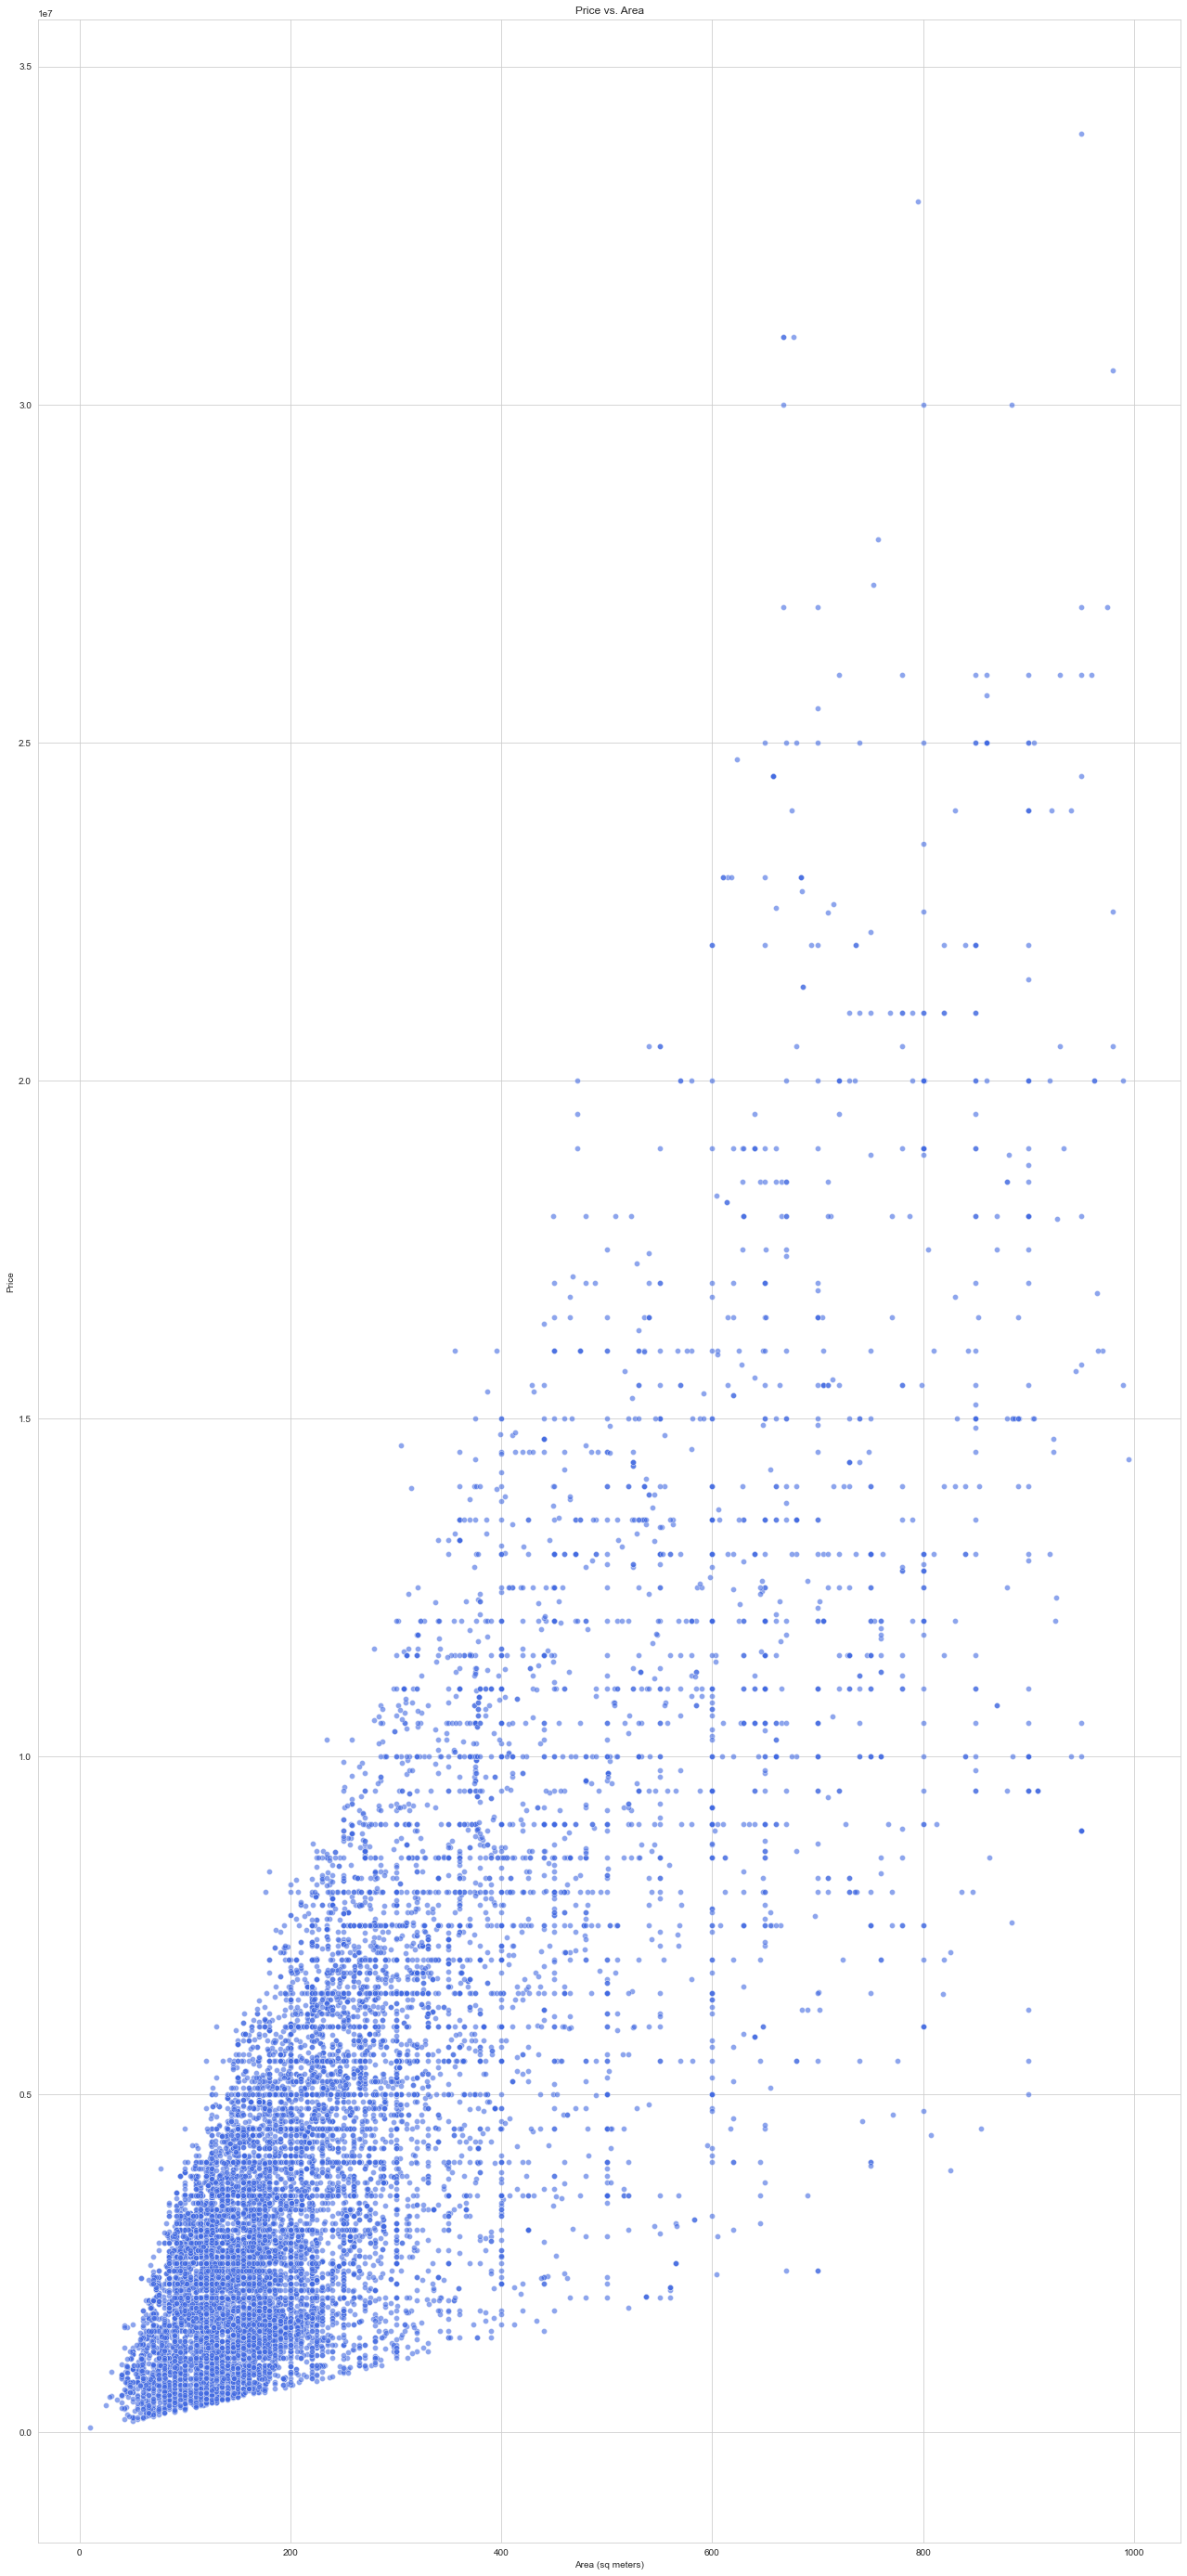

In [79]:
# Plotting Price vs. Area
plt.figure(figsize=(75, 50))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Area', y='Price', data=df6, color='royalblue', alpha=0.6)
plt.title('Price vs. Area')
plt.xlabel('Area (sq meters)')
plt.ylabel('Price')

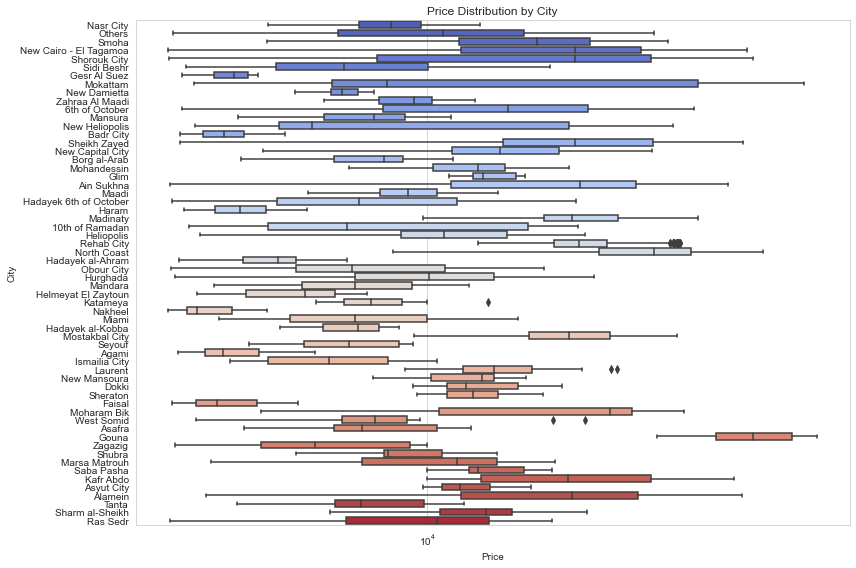

In [80]:
# Box Plot of Prices by City
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price_Per_M', y='City', data=df6, palette="coolwarm")
plt.title('Price Distribution by City')
plt.xlabel('Price')
plt.ylabel('City')
plt.xscale('log')  # Using a logarithmic scale due to wide range of prices
plt.tight_layout()
plt.show()


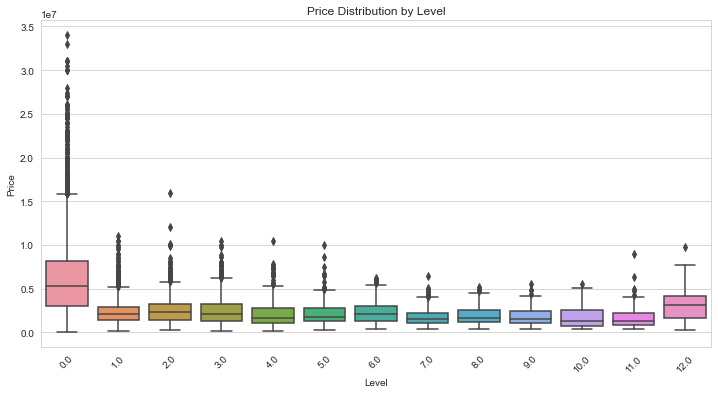

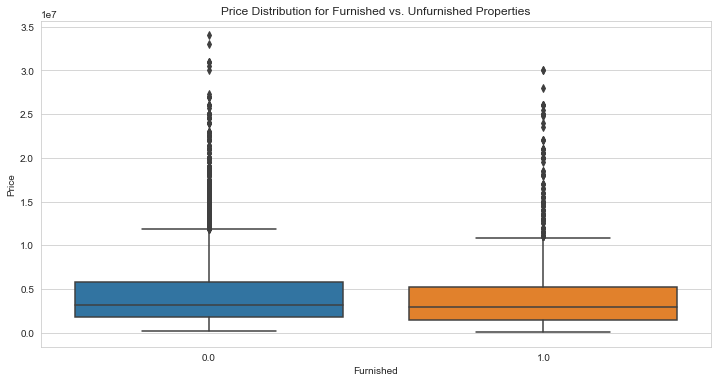

In [81]:
# Level vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Price', data=df6)
plt.title('Price Distribution by Level')
plt.xlabel('Level')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

# Furnished vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Furnished', y='Price', data=df6)
plt.title('Price Distribution for Furnished vs. Unfurnished Properties')
plt.xlabel('Furnished')
plt.ylabel('Price')
plt.show()

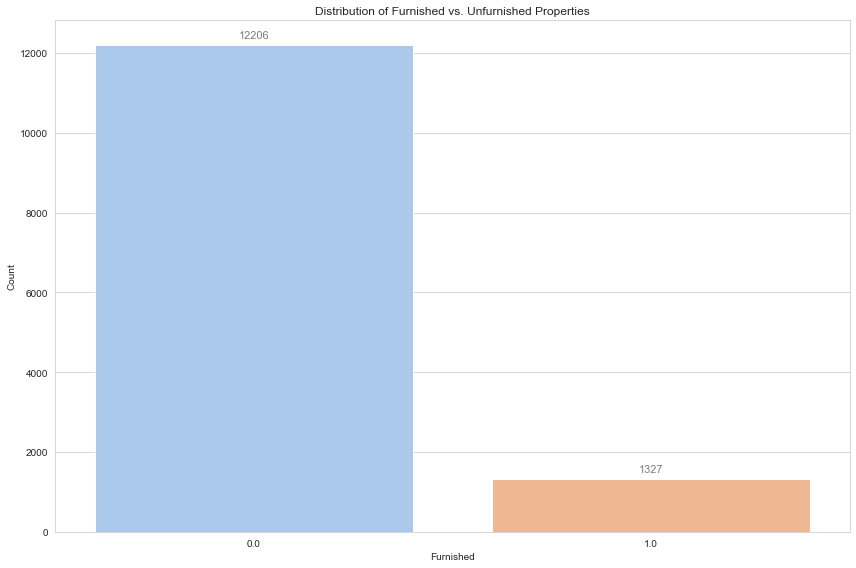

In [82]:
# Count Plot for Furnished vs. Unfurnished Properties
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Furnished', data=df6, palette="pastel")

# Display counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='grey', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Furnished vs. Unfurnished Properties')
plt.xlabel('Furnished')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

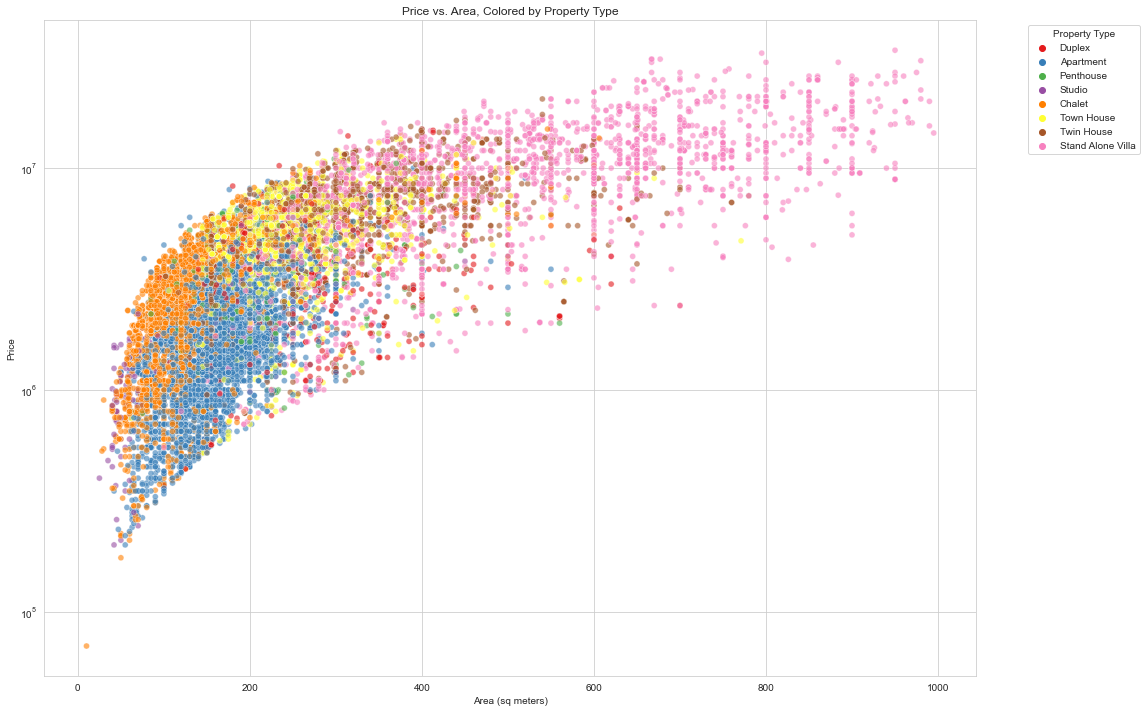

In [83]:
# Price/Area PropertyType colored  
plt.figure(figsize=(16,10))
sns.scatterplot(x='Area', y='Price', hue='Type', data=df6, palette='Set1', alpha=0.6)
plt.title('Price vs. Area, Colored by Property Type')
plt.xlabel('Area (sq meters)')
plt.ylabel('Price')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('linear')  
plt.yscale('log')  # Using a logarithmic scale due to wide range of prices
plt.tight_layout()
plt.show()

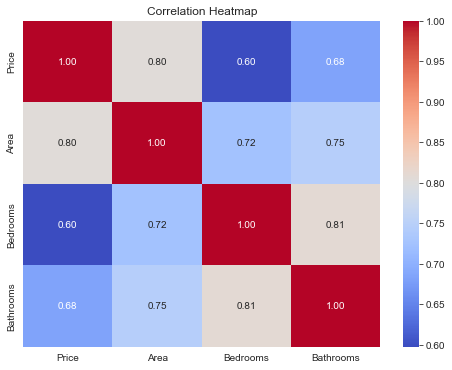

In [84]:
# Selecting numerical columns for the correlation matrix
numerical_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms']
df6_numerical = df6[numerical_cols]

# Calculating the correlation matrix
corr_matrix = df6_numerical.corr()

# Generating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Training and model selection

In [85]:
#Handling categorial features
df7 = pd.get_dummies(df6, columns = ['Type','City' ,'Payment_Option','Delivery_Term'])
df7

,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Price_Per_M,Type_Apartment,Type_Chalet,...,City_West Somid,City_Zagazig,City_Zahraa Al Maadi,Payment_Option_Cash,Payment_Option_Cash or Installment,Payment_Option_Installment,Delivery_Term_Core & Shell,Delivery_Term_Finished,Delivery_Term_Not Finished,Delivery_Term_Semi Finished
0,4000000,3.0,3.0,400.0,0.0,7.0,0.0,10000.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1900000,3.0,2.0,230.0,0.0,10.0,0.0,8260.869565,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1600000,3.0,2.0,220.0,0.0,9.0,0.0,7272.727273,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1500000,3.0,2.0,136.0,0.0,3.0,1.0,11029.411765,1,0,...,0,0,0,1,0,0,0,0,1,0
7,750000,3.0,1.0,115.0,0.0,10.0,0.0,6521.739130,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,500000,1.0,1.0,70.0,1.0,1.0,0.0,7142.857143,0,1,...,0,0,0,1,0,0,0,1,0,0
15049,550000,2.0,2.0,100.0,1.0,0.0,1.0,5500.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
15050,950000,2.0,2.0,150.0,1.0,0.0,0.0,6333.333333,0,0,...,0,0,0,0,1,0,0,1,0,0
15051,1700000,3.0,2.0,250.0,1.0,0.0,0.0,6800.000000,0,0,...,0,0,0,1,0,0,0,1,0,0


In [86]:
X = df7.drop(['Price','Price_Per_M'], axis=1)  # Features
y = df7['Price']  # Target variable

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 1: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform K-Fold Cross-Validation and evaluate models
def evaluate_models(X, y):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
    }
    
    results = []

    for name, model in models.items():
        # Applying 5-fold cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        results.append({
            'Model': name,
            'Mean R² Score': np.mean(cv_scores),
            'Standard Deviation': np.std(cv_scores),
            'All R² Scores': cv_scores
        })
        
    return results

# Call the function and print results
model_performance = evaluate_models(X, y)

# Print the performance
for model_result in model_performance:
    print(f"Model: {model_result['Model']}")
    print(f"Mean R² Score: {model_result['Mean R² Score']:.4f}")
    print(f"Standard Deviation: {model_result['Standard Deviation']:.4f}")
    print(f"All R² Scores: {model_result['All R² Scores']}\n")

Model: Linear Regression
Mean R² Score: 0.7351
Standard Deviation: 0.0098
All R² Scores: [0.72332392 0.74920863 0.74062991 0.7371725  0.72492265]

Model: Random Forest Regressor
Mean R² Score: 0.8000
Standard Deviation: 0.0142
All R² Scores: [0.79076003 0.80082223 0.82696277 0.78715624 0.79410471]

Model: Gradient Boosting Regressor
Mean R² Score: 0.7726
Standard Deviation: 0.0089
All R² Scores: [0.76340473 0.78354007 0.78273974 0.76969999 0.76386056]



In [88]:
#Hyper paramter tuning best models using GridSearch 

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5,7]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7,9]
}

# Setup GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), 
                              param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R² score for Random Forest: {grid_search_rf.best_score_}")

# Setup GridSearchCV for XGBRegressor
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), 
                               param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

print(f"Best parameters for XGB: {grid_search_xgb.best_params_}")
print(f"Best R² score for XGB: {grid_search_xgb.best_score_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score for Random Forest: 0.8030017461861718
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for XGB: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Best R² score for XGB: 0.7947713181995123
